In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

This link contains a small sample of ticket data for 4 anonymized restaurants: <br>
https://drive.google.com/drive/u/0/folders/1ZC7mhi5D8zklu2lAdCeazKVYnHkn9FqF

The data is organized as follows: <br>
- 1 CSV file per restaurant <br>
- Each CSV file has all ticket items for that restaurant in 2018. Ticket items are menu items
(food, drink, etc.) sold during a transaction. Each ticket may have many ticket items.<br>
- Each row of data is a ticket item that was sold (e.g. Cheeseburger sold on 3/25/18 for
$x).

Dataset details:

Each  file is a  view of each ticket and its items, with the following fields:<br>
restaurant_id - unique ID of the restaurant<br>
ticket_id - unique ID of the ticket<br>
ticket_open_time - time ticket was created<br>
ticket_close_time - time ticket was closed  <br>
ticket_guest_count - number of guests on the ticket<br>
business_date - date of the transaction <br>
ticket_tax - cents tax<br>
ticket_tip - cents tip<br>
ticket_net_sales - sales not including tax, tip, discounts, and voids<br>
item_category - top-level item category<br>
item_subcategory - bottom-level item category<br>
item_name - item name <br>
item_id - unique item ID<br>
item_sales - total cents sold for this ticket item (quantity * price)<br>
item_quantity - number of ticket items on ticket<br>
unit_price - individual ticket item price<br>

## TASKS

1)  Import the data into one panda dataframe, with column names as below: <br>
 and rename restaurant ids to 1,2,3 and 4 

In [6]:
col_names = ['restaurant_id', 'ticket_id', 'ticket_open_time', 'ticket_close_time', 'ticket_guest_count', 'business_date', 'ticket_tax', 'ticket_tip', 'ticket_net_sales', 'item_category', 'item_subcategory', 'item_name','item_id', 'item_sales','item_quantity', 'unit_price']

In [1]:
import glob

path = r'/Users/ivanapetrovic/Downloads/Sample Data/' 
all_files = glob.glob(path + "/*.csv")

In [2]:
all_files

['/Users/ivanapetrovic/Downloads/Sample Data/96c09a897dabc8bac7151e95bc989ddc.csv',
 '/Users/ivanapetrovic/Downloads/Sample Data/9099e583385e67c55f6221593a124b04.csv',
 '/Users/ivanapetrovic/Downloads/Sample Data/e05b9136f430b1b7afbf78ae9b094d84.csv',
 '/Users/ivanapetrovic/Downloads/Sample Data/cddda95ca05be38dbc1209ae8c6af6a6.csv']

In [7]:
df = pd.DataFrame()
restaurant_id=0

for filename in all_files:
    restaurant_id += 1 
    df_tmp = pd.read_csv(filename, index_col=None, names=col_names)
    df_tmp['restaurant_id']=restaurant_id  
    df = pd.concat([df, df_tmp], ignore_index = True)

In [8]:
df.head()

,restaurant_id,ticket_id,ticket_open_time,ticket_close_time,ticket_guest_count,business_date,ticket_tax,ticket_tip,ticket_net_sales,item_category,item_subcategory,item_name,item_id,item_sales,item_quantity,unit_price
0,1,1995685763,2018-02-09 19:27:50,2018-02-11 03:39:36,2,2018-02-09,0.0,0.0,0.0,Food,Brunch,Arugula Salad,d5fb640a-72de-41aa-94af-b28292fba623,13.0,1.0,13.0
1,1,1995685763,2018-02-09 19:27:50,2018-02-11 03:39:36,2,2018-02-09,0.0,0.0,0.0,Food,Entrees,Trout,014669be-1ec3-485d-b19b-586a55bc0cf7,29.0,1.0,29.0
2,1,1995685763,2018-02-09 19:27:50,2018-02-11 03:39:36,2,2018-02-09,0.0,0.0,0.0,Food,Entrees,Trout,014669be-1ec3-485d-b19b-586a55bc0cf7,29.0,1.0,29.0
3,1,1995685763,2018-02-09 19:27:50,2018-02-11 03:39:36,2,2018-02-09,0.0,0.0,0.0,Beverage,Wine,Bourgogne Blanc Sml,21d1ca64-6e48-46c2-a41e-8d9694c33713,13.0,1.0,13.0
4,1,1995685763,2018-02-09 19:27:50,2018-02-11 03:39:36,2,2018-02-09,0.0,0.0,0.0,Beverage,Wine,Bourgogne Blanc Sml,21d1ca64-6e48-46c2-a41e-8d9694c33713,13.0,1.0,13.0


In [7]:
df.shape

(391378, 16)

In [8]:
df.dtypes

restaurant_id           int64
ticket_id               int64
ticket_open_time       object
ticket_close_time      object
ticket_guest_count      int64
business_date          object
ticket_tax            float64
ticket_tip            float64
ticket_net_sales      float64
item_category          object
item_subcategory       object
item_name              object
item_id                object
item_sales            float64
item_quantity         float64
unit_price            float64
dtype: object

2) Visualize daily total net sales of the restaurant #3. Which date does it reach its maximum?

In [9]:
### Date columns
df['ticket_open_time'] = pd.to_datetime(df['ticket_open_time'],infer_datetime_format=True)
df['ticket_close_time'] = pd.to_datetime(df['ticket_close_time'],infer_datetime_format=True)
df['business_date'] = pd.to_datetime(df['business_date'],infer_datetime_format=True)

In [10]:
df.dtypes

restaurant_id                  int64
ticket_id                      int64
ticket_open_time      datetime64[ns]
ticket_close_time     datetime64[ns]
ticket_guest_count             int64
business_date         datetime64[ns]
ticket_tax                   float64
ticket_tip                   float64
ticket_net_sales             float64
item_category                 object
item_subcategory              object
item_name                     object
item_id                       object
item_sales                   float64
item_quantity                float64
unit_price                   float64
dtype: object

In [11]:
df.loc[df.restaurant_id==3].head(10)

,restaurant_id,ticket_id,ticket_open_time,ticket_close_time,ticket_guest_count,business_date,ticket_tax,ticket_tip,ticket_net_sales,item_category,item_subcategory,item_name,item_id,item_sales,item_quantity,unit_price
99041,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,LIQUOR,CALL,TITO'S,147,7.0,1.0,7.0
99042,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,SPECIALS,APPETIZER,MOZZARELLA WEDGES,2635,8.5,1.0,8.5
99043,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,WINE,RED GLASS,MACMURRAY PINOT NOIR,5037,10.0,1.0,10.0
99044,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,WINE,RED GLASS,MACMURRAY PINOT NOIR,5037,10.0,1.0,10.0
99045,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,WINE,RED GLASS,MACMURRAY PINOT NOIR,5037,10.0,1.0,10.0
99046,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,PIZZA,PIZZA,MARGHARITA PIZZA,2701,9.9,1.0,9.9
99047,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,BEER,DOMESTIC BTL,GOOSE SOFIE,1345,11.0,1.0,11.0
99048,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,BEER,DOMESTIC BTL,SAM ADAMS WINTER,1160,5.0,1.0,5.0
99049,3,1847775477,2018-01-01 21:13:00,2018-01-02 02:53:55,1,2018-01-01,6.11,20.0,76.4,BEER,DOMESTIC BTL,SAM ADAMS WINTER,1160,5.0,1.0,5.0
99050,3,1847775379,2018-01-01 21:13:00,2018-01-02 02:50:33,1,2018-01-01,4.23,0.0,52.9,LIQUOR,CORDIALS,RUMPLEMINZ,780,6.0,1.0,6.0


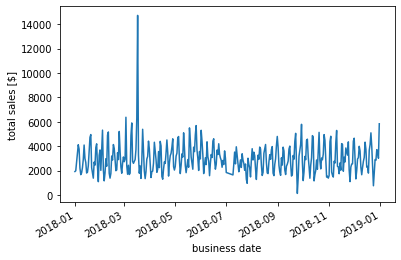

In [11]:
restaurant_id=3
daily_sales=df[df['restaurant_id']==restaurant_id].groupby(['business_date','ticket_id']).mean()[['ticket_net_sales']].groupby('business_date').sum()
daily_sales.plot(legend=False)
plt.xlabel('business date')
plt.ylabel('total sales [$]')
plt.show()

In [12]:
#Day of the year with the largest sale: date, total amount of sales, and day of the week
print(daily_sales.idxmax())
print(daily_sales.max())
import calendar
calendar.day_name[daily_sales.idxmax()['ticket_net_sales'].weekday()]

ticket_net_sales   2018-03-17
dtype: datetime64[ns]
ticket_net_sales    14732.8
dtype: float64


'Saturday'

3) Plot a heatmap of the average total net sales of restaurant #3 per day of the week and month

In [13]:
heatmap = np.zeros((7, 12))
qmap = np.zeros((7, 12))  
#heatmap[:] = np.nan

restaurant_id=3
daily_sales=df[df['restaurant_id']==restaurant_id].groupby(['business_date','ticket_id']).mean()[['ticket_net_sales']].groupby('business_date').sum()

for ind in range(0,len(daily_sales.index)):
    day=daily_sales.index[ind].dayofweek
    month=daily_sales.index[ind].month
    qmap[day, month-1] += 1
    heatmap[day, month-1] = heatmap[day, month-1]+daily_sales['ticket_net_sales'][ind]  

heatmap = np.divide(heatmap,qmap)

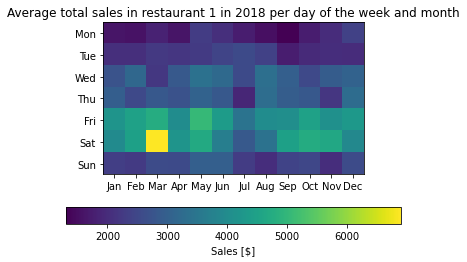

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')
ax.set_title('Average total sales in restaurant 1 in 2018 per day of the week and month')
ax.set_yticks(range(7))
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_xticks(range(12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Sales [$]')

4) Compute and visualize total net food sales in 2018 and total net drink sales in 2018 for each restaurant

In [15]:
df['item_category'].unique()

array(['Food', 'Beverage', 'Gift Cards', 'Cooking classes',
       'Room Deposit', 'Retail', 'Retail Beers', 'Merchandise',
       'Employee Price List', 'Fees', 'LIQUOR', 'SPECIALS', 'WINE',
       'PIZZA', 'BEER', 'ENTREES', 'SOUP/SALADS', 'SANDW/BURGERS',
       'BEVERAGES', 'APPETIZERS', 'CHILDRENS', 'SIDES', 'DESSERTS',
       'PROMOTION/DISCOUNTS', 'RETAIL', 'MISC CHARGES', nan, 'FUNCTIONS',
       'Non Alcoholic Beverages', 'Breakfast', 'Beverages', 'Misc.',
       'Liquor', 'Gift Certificate'], dtype=object)

In [16]:
List_drinks=['N/A Bev','Beer', 'Liquor', 'Wine','BEER', 'Beverage','N/A BEVERAGES', 'Spirits', 'Cocktails','Retail Beers','Beverages','Non Alcoholic Beverages', 'LIQUOR', 'WINE','BEVERAGES', 'LIQUOR OPTIONS', 'DRAFT BEER', 'BOTTLE BEER', 'FUNCTIONS']

In [17]:
List_food=['Flatbreads','Food','Creamery', 'Kids', 'New Years','Curry', 'FOOD','Specials','Breakfast Sides', 'Breakfast', 'Bakery','Lunch', 'Soups & Salads', 'Grab n Go', 'Breakfast special','Breakfast Sandwiches', 'Dinner', 'SPECIALS', 'PIZZA','ENTREES', 'SOUP/SALADS', 'SANDW/BURGERS','APPETIZERS', 'CHILDRENS', 'SIDES', 'DESSERTS','SANDWICHES', 'FOOD OPTIONS', 'KIDS', 'SOUP/SALADS/APPS','FOOD OPTIONS CONT.','PIZZA / CALZONE','Launch','ENTREE', 'APPETIZER', 'DESSERT']

In [18]:
# total sales of food vs drinks at the restaurants in 2018, not including tax, tips, discounts and voids
s_items_drinks=[];
s_items_food=[];
store_id=0;
for filename in all_files:
    store_id += 1
    s_items_drinks.append(df[(df['restaurant_id']==store_id) & (df['item_category'].isin(List_drinks))].groupby('ticket_id')['item_sales'].sum().sum().round())
    s_items_food.append(df[(df['restaurant_id']==store_id) & (df['item_category'].isin(List_food))].groupby('ticket_id')['item_sales'].sum().sum().round())
                   

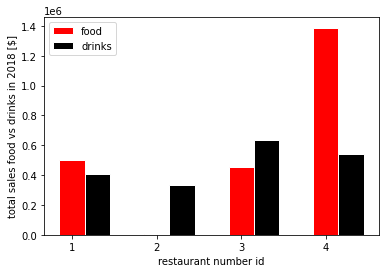

In [19]:
barWidth=0.3
r1 = np.arange(4)
r2 = [x + barWidth for x in r1]
plt.bar(r1, s_items_food, color='red', width=barWidth, edgecolor='white', label='food')
plt.bar(r2, s_items_drinks, color='black', width=barWidth, edgecolor='white', label='drinks')
plt.xticks(np.arange(4), np.arange(1,5))
plt.xlabel("restaurant number id")
plt.ylabel("total sales food vs drinks in 2018 [$]")
plt.legend()
plt.show()